# Kunskapskontroll Alvin Lagerson
## 1. Teoretiska frågor
### 1.1 Beskriv kort hur en relationsdatabas fungerar.
I en relationsdatabas är data lagrad i tabeller som består av rader och kolumner med data. Denna data har relationer och kan sammankopplas mellan olika tabeller för att få ut t.ex. relaterad information eller för att hitta intressanta samband. Genom att använda sig av en databashanterare som t.ex. MSSQL kan man genom programmeringsspråket SQL hämta ut och modifiera data.

### 1.2 Vad menas med “CRUD”-flödet?
CRUD står för Create, Read, Update, Delete och är de grundläggande operationerna man kan göra i en relationsdatabas. 

### 1.3 Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
En left join kopplar samman kolumner i två tabeller med fokus på den första. Det innebär att data som finns i första kolumnen kommer skrivas ut även om det inte finns någon data i den andra kolumnen. Inner join innebär att enbart gemensam data kommer skrivas ut, alltså där det finns data i både första och andra kolumnen/tabellen. De används för att koppla samman kolumner i olika tabeller, data bör bara finnas på en plats i en databas. Dels för att säkerställa att uppdateringar sker enkelt och korrekt och inte behöver göras på fler platser samt att stora mängder data tar utrymme, ett sätt att spara utrymme är att data bara finns på en plats. Så anropar man data genom joins beroende på vad man behöver.

### 1.4 Beskriv kort vad indexering i SQL innebär.
Indexering innebär att man skapar en datastruktur som gör det möjligt att hitta rader i en tabell, utan att söka igenom alla rader. Det används för att förbättra prestandan vid sökningar och queries men kan öka arbetsbelastningen för kodaren eftersom index måste uppdateras vid modifiering av data. 

### 1.5 Beskriv kort vad en vy i SQL är.
En vy är en virtuell tabell, ibland med begränsade rättigheter. Det kan exempelvis vara att du inte anses behöva full access och endast kan se viss utvald data om någon annan gör en vy åt dig. En vy är inte en tabell utan innehållet i en vy räknas ut varje gång man tittar på den och hämtas från andra tabeller. 

### 1.6 Beskriv kort vad en lagrad procedur i SQL är.
Sparad kod som återvinns. Det finns flera fördelar med lagrade procedurer, dels spar man tid när man inte behöver skriva om kod som man använder ofta och dels kan flera använda samma kod för att säkerställa att man tar ut data likadant och på så sätt får ett jämförbart/konsekvent resultat.

## 2. Programmeringsuppgift

### 2.2 Gör en deskriptiv sammanfattning av AdventureWorks2022
AdventureWorks2022 är en relationsdatabas för ett företag som tillverkar och säljer cyklar, kläder, delar och tillbehör. Databasen använder primärnycklar och främmande nycklar för att skapa relationer mellan tabeller. Databasen är organiserad genom att strukturera upp sin data enligt kategorierna: HR, Person, Production, Purchasing och Sales. Tabellerna inom HR innehåller bland annat information om anställda och vart de jobbar, vad de fått för lön och vilken ställning de har inom företaget. Persontabellerna består till stor del av olika sorters kontaktinformation för anställda, kunder och leverantörer. Tabellerna för produktion innehåller detaljerad data kopplat till företagets produkter med allt från historisk kostnad till relationen mellan produkt och komponent samt lagernivåer. I tabellerna för Inköp hittar vi information om bland annat vilka leverantörer som kopplas till företagets produkter och orderhistorik men även detaljer för inköpen. De sista tabellerna handlar om företagets försäljning och innefattar detaljerad information om allt möjligt inom försäljning, vem som sålt, vart det sålts men även saker som kampanjer etc.

In [ ]:
# Installerar SQLalchemy, redan körd

! pip install sqlalchemy pyodbc pandas jupyter

In [845]:
# Importerar bibliotek
from sqlalchemy.engine import create_engine, URL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ändrar bredden på Pandas dataframe för snyggare utskrift
pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000) # Ett annat alternativ

In [847]:
# Ansluter till server lokalt och anger vilken databas som ska hämtas.
SERVER = 'localhost'
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)

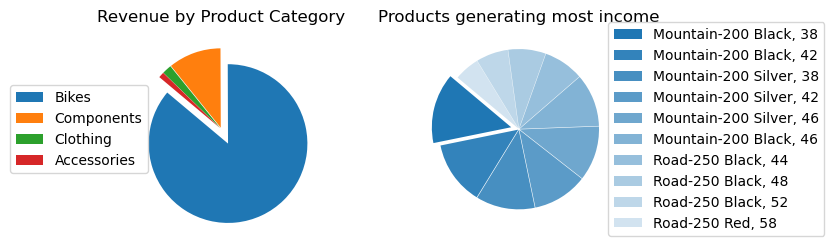

In [849]:
# Piechart nummer ett börja med en query
query4 = """  SELECT 
    A.Name AS CategoryName,
    CAST(ROUND(SUM(B.LineTotal),0) AS int) AS TotalRevenue
FROM 
    Sales.SalesOrderDetail AS B
JOIN 
    Production.Product AS C ON B.ProductID = C.ProductID
JOIN 
    Production.ProductSubcategory AS D ON C.ProductSubcategoryID = D.ProductSubcategoryID
JOIN 
    Production.ProductCategory AS A ON D.ProductCategoryID = A.ProductCategoryID
GROUP BY 
    A.Name
ORDER BY 
    Sum(B.LineTotal) DESC;  
"""
# Exekvera queryn och hämta data till en dataframe
products = pd.read_sql(query4, engine)

# Definiera variabler till kategorinamn
labels = products['CategoryName']
sizes = products['TotalRevenue']

# En rad, två charts, definierar första pajens position, 1
plt.subplot(1, 2, 1)

# Skapa diagrammet och lägg till figurförklaring och titel
plt.pie(sizes, startangle=140, explode = [0.2, 0.02, 0.02, 0.02])
plt.legend(labels=labels, bbox_to_anchor=(-0.60, 0.5), loc='center left')
plt.title('Revenue by Product Category')


# Pichart nummer två
query3 = """SELECT TOP 10
    A.Name AS Produkt,
    SUM(B.OrderQty) AS SåldaEnheter,
    SUM(B.LineTotal) AS TotalaIntäkter,
	SUM(C.StandardCost) AS TotalaKostnader,
	SUM(B.LineTotal)-SUM(C.StandardCost) AS Netto
FROM Sales.SalesOrderDetail AS B
JOIN Production.Product AS A ON B.ProductID = A.ProductID
JOIN Production.ProductCostHistory AS C ON C.ProductID = B.ProductID

GROUP BY A.Name
ORDER BY SUM(B.LineTotal) DESC;
"""
# Exekvera queryn och hämta data till en dataframe
revenue = pd.read_sql(query3, engine)

# Definiera variabler till kategorinamn
labels2 = revenue['Produkt']
sizes2 = revenue['TotalaIntäkter']

############ Test av färgloop
from matplotlib.colors import to_rgba

# Grundfärgen för Bikes (Blå) i färgkod
base_color = "#1F77B4"

# Skapar en Array med start på 1 ner till 0,2 med 10 jämna mellanrum
opacities = np.linspace(1, 0.2, 10)

# Skapar en lista med olika genomskinlighet i en loop
p2_colors = [to_rgba(base_color, opacity) for opacity in opacities]

########### Slut på experimentloopen

# En rad, två charts, definierar andra pajens position
plt.subplot(1, 2, 2)


# Skapa diagrammet och lägg till figurförklaring och titel
plt.pie(sizes2, startangle=140, explode = [0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], colors=p2_colors)
plt.legend(labels=labels2, bbox_to_anchor=(0.95, 0.5), loc="center left", borderaxespad=0)
plt.title('Products generating most income')

# Ändra mellanrummet mellan diagrammen, sen rita upp diagrammen
plt.subplots_adjust(wspace=0.5)
plt.show()

By raising the prices of all of the most sold non-bike products with only 1$ the total 
income could increase with approximately $109,538, if the sales drops with 20%,
to $136,923 per year if the sales stays the same.
This would increase the price of the cheapest product ($4) with 25%
and the most expensive product ($32) with only 3%.


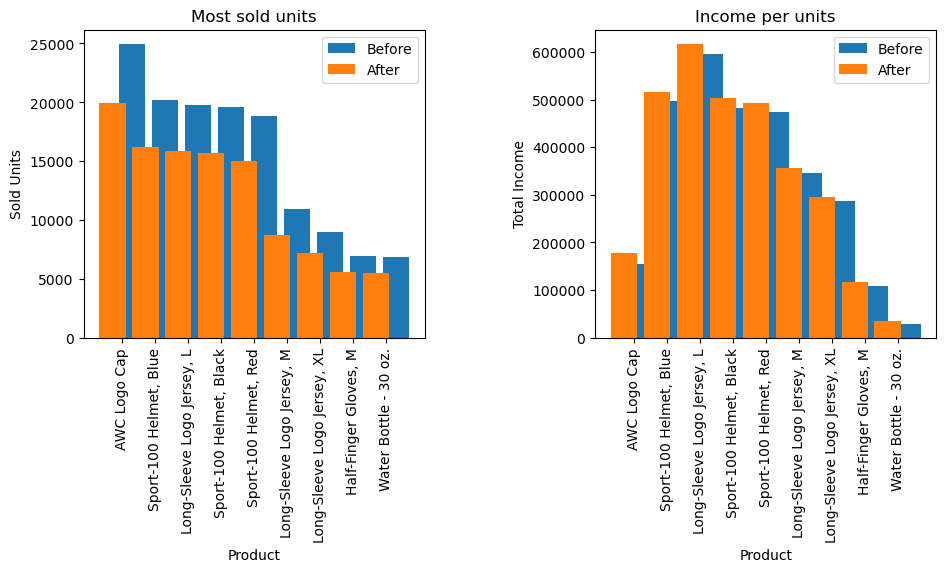

In [851]:
query1 = """SELECT TOP 9
    A.Name AS Product,
    SUM(B.OrderQty) AS SoldUnits,
    CAST(ROUND(SUM(B.LineTotal), 0) AS int) AS TotalIncome,
	CAST(ROUND(SUM(C.StandardCost), 0) AS int) AS TotalCost,
	CAST(ROUND(SUM(B.LineTotal)-SUM(C.StandardCost), 0) AS int) AS Net,
    CAST(ROUND(SUM(B.LineTotal)/SUM(B.OrderQty), 0) AS int) AS PPU
FROM Sales.SalesOrderDetail AS B
JOIN Production.Product AS A ON B.ProductID = A.ProductID
JOIN Production.ProductCostHistory AS C ON C.ProductID = B.ProductID

GROUP BY A.Name
ORDER BY SUM(B.OrderQty) DESC;
"""

# Exekvera queryn och hämta data till en dataframe
quantity = pd.read_sql(query1, engine)

# Skapar en lista och lägger alla värden i 'Product' i listan
X_list = []
X_list = [item for item in quantity['Product']]

# Returnerar jämnt fördelade värden på antar värdel i X_list
X_axis = np.arange(len(X_list))

# Skriv ut tolkning av graferna
print (f"""By raising the prices of all of the most sold non-bike products with only 1$ the total 
income could increase with approximately ${sum(quantity['SoldUnits'])*0.8:,.0f}, if the sales drops with 20%,
to ${sum(quantity['SoldUnits']):,.0f} per year if the sales stays the same.
This would increase the price of the cheapest product (${quantity['PPU'].min()}) with {1/quantity['PPU'].min()*100:.0f}%
and the most expensive product (${quantity['PPU'].max()}) with only {1/quantity['PPU'].max()*100:.0f}%.""")

# Storleken på figuren som skrivs ut
plt.figure(figsize=(11, 4))

# Subplot, 1 rad, 2 grafer och 1:a grafen
plt.subplot(1,2,1)

# Ritar upp grafen, lägger till legend, titel, x,y titlar och vad staplarna representerar
plt.bar(X_axis+0.3, quantity['SoldUnits'], label = 'Before')
plt.bar(X_axis-0.3, quantity['SoldUnits']*0.8, label = 'After')
plt.legend()
plt.title('Most sold units')
plt.xlabel('Product')
plt.ylabel('Sold Units')
plt.xticks(X_axis, X_list, rotation=90)

# Subplot, 1 rad, 2 grafer och 2:a grafen
plt.subplot(1,2,2)

# Ritar upp grafen, lägger till legend, titel, x,y titlar och vad staplarna representerar
plt.bar(X_axis+0.3, quantity['TotalIncome'], label = 'Before')
plt.bar(X_axis-0.3, quantity['TotalIncome']+quantity['SoldUnits']*1, label = 'After')
plt.legend()
plt.title('Income per units')
plt.xlabel('Product')
plt.ylabel('Total Income')
plt.xticks(X_axis, X_list, rotation=90)

# Justerar mellanrummen mellan graferna
plt.subplots_adjust(wspace=0.5)
plt.show()

The most profitable products per sold unit is shown in blue to the left. The red reference line is the
average profit per sold unit of the 10 most sold products. The left bar chart shows us the profit per 
product category. By working towards cutting cost and adjust the price of the most sold products categories with the 
goal to get the profit per unit up to the same level as the most profitable product, the total profit could grow
to $15,665,230 in the long run if the sales stays the same.


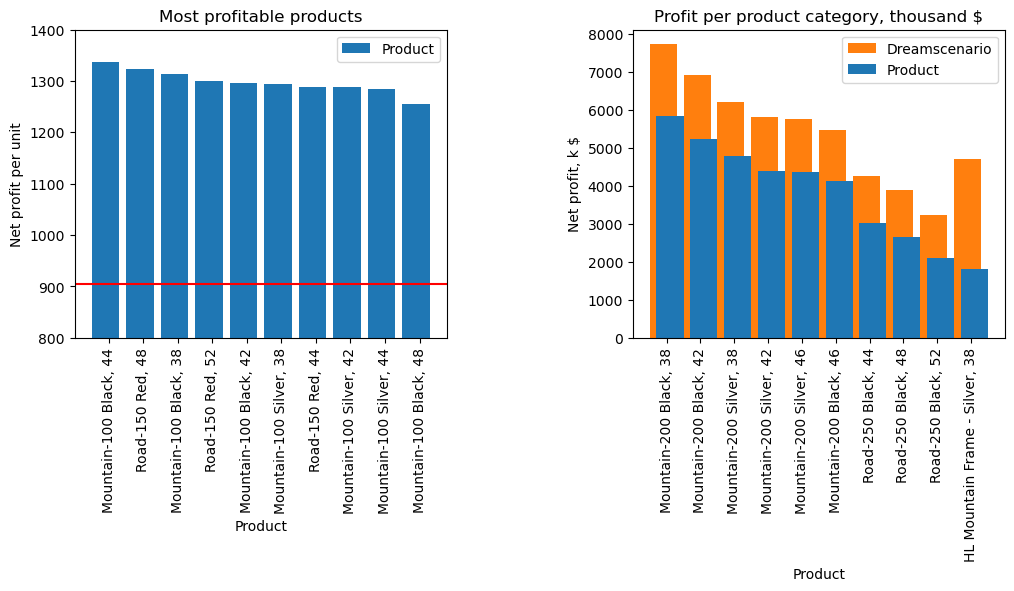

In [998]:
query2 = """SELECT TOP 10
    A.Name AS Product,
    SUM(B.OrderQty) AS SoldUnits,
    CAST(ROUND(SUM(B.LineTotal), 0) AS int) AS TotalIncome,
	CAST(ROUND(SUM(C.StandardCost), 0) AS int) AS TotalCost,
	CAST(ROUND(SUM(B.LineTotal)-SUM(C.StandardCost), 0) AS int) AS Net,
    CAST(ROUND((SUM(B.LineTotal)-SUM(C.StandardCost))/SUM(B.OrderQty), 0) AS int) AS NPU
FROM Sales.SalesOrderDetail AS B
JOIN Production.Product AS A ON B.ProductID = A.ProductID
JOIN Production.ProductCostHistory AS C ON C.ProductID = B.ProductID

GROUP BY A.Name
ORDER BY NPU DESC;
---ORDER BY SUM(B.LineTotal) - SUM(C.StandardCost) DESC;
"""

# Exekvera queryn och hämta data till en dataframe
netto = pd.read_sql(query2, engine)

query22 = """SELECT TOP 10
    A.Name AS Product,
    SUM(B.OrderQty) AS SoldUnits,
    CAST(ROUND(SUM(B.LineTotal), 0) AS int) AS TotalIncome,
	CAST(ROUND(SUM(C.StandardCost), 0) AS int) AS TotalCost,
	CAST(ROUND(SUM(B.LineTotal)-SUM(C.StandardCost), 0) AS int) AS Net,
    CAST(ROUND((SUM(B.LineTotal)-SUM(C.StandardCost))/SUM(B.OrderQty), 0) AS int) AS NPU
FROM Sales.SalesOrderDetail AS B
JOIN Production.Product AS A ON B.ProductID = A.ProductID
JOIN Production.ProductCostHistory AS C ON C.ProductID = B.ProductID

GROUP BY A.Name
---ORDER BY NPU DESC;
ORDER BY Net DESC;
"""

# Exekvera queryn och hämta data till en dataframe
netto2 = pd.read_sql(query22, engine)

# Skapar en lista och lägger alla värden i 'Product' i listan
x_list2 = []
x_list2 = [item for item in netto['Product']]

# Returnerar jämnt fördelade värden på antal värden i x_list2
x_axis2 = np.arange(len(x_list2))

# Skapar en lista och lägger alla värden i 'Product' i listan
x_list3 = []
x_list3 = [item for item in netto2['Product']]

# Returnerar jämnt fördelade värden på antal värden i x_list3
x_axis3 = np.arange(len(x_list3))

# Storleken på figuren som skrivs ut
plt.figure(figsize=(12, 4))

# Subplot, 1 rad, 2 grafer och 1:a grafen
plt.subplot(1,2,1)

# Sätter en limit på y-axeln för att tydligare se skillnaden
plt.ylim(800, 1400)

# Ritar upp grafen och en referenslinje lägger till legend, titel, x,y titlar och vad staplarna representerar
plt.bar(x_axis2-0.1, netto['NPU'], label = 'Product')
plt.axhline(y = sum(netto2['NPU'])/10, color = 'r', linestyle = '-')
plt.legend()
plt.title('Most profitable products')
plt.xlabel('Product')
plt.ylabel('Net profit per unit')
plt.xticks(x_axis2, x_list2, rotation=90)

# Subplot, 1 rad, 2 grafer och 2:a grafen
plt.subplot(1,2,2)

# Ritar upp grafen, lägger till legend, titel, x,y titlar och vad staplarna representerar
plt.bar(x_axis3-0.1, (netto2['SoldUnits']*(sum(netto['NPU'])/10))/1000, label = 'Dreamscenario', color = '#FF7F0E')
plt.bar(x_axis3+0.1, netto2['Net']/1000, label = 'Product', color = '#1F77B4')

plt.legend()
plt.title('Profit per product category, thousand $')
plt.xlabel('Product')
plt.ylabel('Net profit, k $')
plt.xticks(x_axis3, x_list3, rotation=90)

# Justerar mellanrummen mellan graferna
plt.subplots_adjust(wspace=0.5)

# Skriv ut tolkning av graferna
print (f"""The most profitable products per sold unit is shown in blue to the left. The red reference line is the
average profit per sold unit of the 10 most sold products. The left bar chart shows us the profit per 
product category. By working towards cutting cost and adjust the price of the most sold products categories with the 
goal to get the profit per unit up to the same level as the most profitable product, the total profit could grow
to ${(sum(netto2['SoldUnits']*(sum(netto['NPU'])/10))-sum(netto2['Net'])):,.0f} in the long run if the sales stays the same.""")

plt.show()



Is the best salesperson statistically significant? No. 
A bonus should be granted based on performance in any case. Even though the salesperson 
with the highest sales isn't significantly better, they still performed best and should be rewarded.
Is there a correlation between the bonus and the sales? No. A correlation of 0.1141 and a P-value
of: 0.6976 indicates that bonus hasn't been paid out based on performance. Rewarding the sales person
is important for the implementation of my earlier recommendation for future raise in profit to keep
the salesperson engaged and motivated.


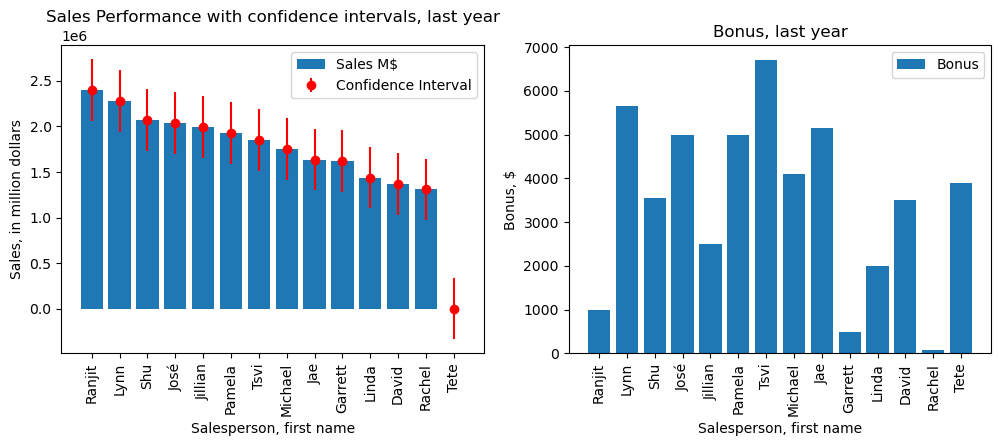

In [1002]:
"""query5 = 
SELECT 
    A.BusinessEntityID AS SalesPersonID,
    B.FirstName + ' ' + B.LastName AS SalesPersonName,
    SUM(C.SubTotal) AS TotalSales
FROM Sales.SalesOrderHeader AS C
JOIN Sales.SalesPerson AS A ON C.SalesPersonID = A.BusinessEntityID
JOIN HumanResources.Employee AS D ON A.BusinessEntityID = D.BusinessEntityID
JOIN Person.Person AS B ON D.BusinessEntityID = B.BusinessEntityID
GROUP BY A.BusinessEntityID, B.FirstName, B.LastName
ORDER BY TotalSales DESC;
"""
# Första raden, hela namnet. SELECT C.FirstName+' '+C.LastName AS SalesPerson, 
query5 = """
SELECT C.FirstName AS SalesPerson, 
	A.SalesLastYear AS "LastYear", 
	A.SalesYTD AS "YTD",
	B.Name AS Area, 
	D.Hiredate AS  StartDate,
	A.Bonus
	FROM Person.Person AS C 
	JOIN Sales.SalesPerson AS A ON C.BusinessEntityID = A.BusinessEntityID
	JOIN sales.SalesTerritory AS B ON A.TerritoryID = B.TerritoryID
	JOIN HumanResources.Employee AS D ON A.BusinessEntityID = D.BusinessEntityID
	ORDER BY "LastYear" DESC;
"""

# Exekvera queryn och hämta data till en dataframe
sales = pd.read_sql(query5, engine)

# Beräkna standardavvikelse på förra årets försäljning
sales_std = sales['LastYear'].std()

# Sätter konfidensintervall till 95%
confidence = 0.95

# Hämtar ut antalet från  i dataframe till
n = len(sales)

# Frihetsgrader
freedom = n - 1

# Sätter kritiska t-värdet
t_critical = stats.t.ppf(1 - (1 - confidence) / 2, df = freedom)

# Beräknar det nedre och det övre värdet av konfidensintervallet. 
sales['CI_Lower'] = sales['LastYear'] - t_critical * (sales_std / np.sqrt(n))
sales['CI_Upper'] = sales['LastYear'] + t_critical * (sales_std / np.sqrt(n))

# Identifierar och returnerar bäst säljande person förra året genom dens index
best_salesperson = sales.loc[sales['LastYear'].idxmax()]

# Kontrollerar om den bästa säljaren är statistiskt signifikant bättre och lägger ett värde True/False
is_best_confident = all(best_salesperson['LastYear'] > sales.loc[sales.index != sales['LastYear'].idxmax(), 'CI_Upper'])

# Test av korrelation mellan försäljning och bonus
correlation, p_value = stats.pearsonr(sales['Bonus'], sales['LastYear'])

# Signifikansnivå
limit = 0.05  
                                      
# Skriv ut resultat
print(f"""Is the best salesperson statistically significant? {'Yes' if is_best_confident else 'No'}. 
A bonus should be granted based on performance in any case. Even though the salesperson 
with the highest sales isn't significantly better, they still performed best and should be rewarded.
Is there a correlation between the bonus and the sales? {'Yes' if p_value < limit else 'No'}. A correlation of {correlation:.4f} and a P-value
of: {p_value:.4f} indicates that bonus {'has' if p_value < limit else "hasn't"} been paid out based on performance. Rewarding the sales person
is important for the implementation of my earlier recommendation for future raise in profit to keep
the salesperson engaged and motivated.""")

# Skriv ut diagram
plt.figure(figsize=(12, 4))

# Första subplotdiagrammet
plt.subplot(1, 2, 1)
plt.bar(sales['SalesPerson'], sales['LastYear'], label='Sales M$')

# Skriv ut konfidensintervall i diagrammet. yerr är errorbar på y, punkt på varje istället för linje. Sen egenskaper.
plt.errorbar(sales['SalesPerson'], sales['LastYear'], yerr=t_critical * (sales_std / np.sqrt(n)), fmt='o', color='red', label='Confidence Interval')
plt.xticks(rotation=90)
plt.title('Sales Performance with confidence intervals, last year')
plt.xlabel('Salesperson, first name')
plt.ylabel('Sales, in million dollars')
plt.legend()

# Andra subplotdiagrammet
plt.subplot(1, 2, 2)

# Skriv ut ett diagram för erlagd bonus per person
plt.bar(sales['SalesPerson'], sales['Bonus'], label='Bonus')
plt.xticks(rotation=90)
plt.title('Bonus, last year')
plt.xlabel('Salesperson, first name')
plt.ylabel('Bonus, $')
plt.legend()
plt.show()

### Executive summary
My focus has been on sales. By making pretty fast and easy changes you can raise your profit by over a hundret thousand dollars annually if everything else stays the same. Raise the prices of all non-bike products with 1 dollar. 

While focusing on the core products, the bikes, you can start a  long term job cutting costs, renegotiate with suppliers and adjust prices. If you can manage to get your most sold products to generate as much profit as the most profitable ones you have potentially profit growth of $16 million dollars annually. 

Bonuses are not based on sales performance, by remaking the bonus system to reflect sales you can engage and motivate the sales staff. This is important when you start the long time work to increase your profits. 

According to studies, by starting to offer a more premium version of your finest bike with a price a couple of hundred dollars above your current most costly ones, the sales of the same will increase.

### Självutvärdering
Den största utmaningen jag hade var att när jag skulle sätta mig och jobba i mellandagarna hade datorn startat om och jag hade förlorat arbetet jag gjort senaste 7 dagarna. Så, koden kan vara lite inkonsekvent eftersom jag skrev på svenska från början men det rimmade dåligt med produktnamn och jag skrev om på engelska så det kan vara lite gammalt kvar. Jag var lite naiv och fick för mig att eftersom Jupyter körs via webbläsaren så var det molnlagring men så fort jag tänkte efter visste jag ju att filen var lokal på datorn. Efter detta sparar jag regelbundet efter minsta ändring. I övrigt tyckte jag det svåraste var att komma igång. Eftersom det var så fria tyglar och en stor databas så tog det många dagar att navigera runt i databasen och testa olika queries innan jag kom igång och bärjade titta på något specifikt. Det blev många queries som ju inte blev med i slutprodukten. På redovisningen nu 250103 så visade det sig att vi hade väldigt olika tolkningar på tentan och helt olika tillvägagångssätt. Själv tänkte jag mig att jag haft en konsulterande roll till AW och fokus har för mig varit att hämta ut data från databasen och presentera den medan några andras fokus mer varit att presentera själva databasen. Hur som helst, är det något jag missförstått så löser vi ju det.

Jag är nöjt med ett G men blir ju helt klart glad för ett VG. Jag tycker jag har gjort ett hyfsat gediget arbete som eventuellt skulle kunna nå VG, men det beror ju helt på vad ni har för vision och om jag träffat den.

Jag la en del tid i början på att fixa queries i MSSQL men i slutänden så var det ändå i Python jag ordnade med formatering, tweakade ändringar etc så det hade jag lagt mindre tid på. 